In [32]:
import numpy as np
import matplotlib.pyplot as plt

In [58]:
# Plote a rede neural rasa. Vamos supor que a entrada esteja no intervalo [0,1] e a saída [-1,1]
# Se o sinalizador plot_all estiver definido como verdadeiro, então plotaremos todas as etapas intermediárias como na Figura 3.3
def plot_neural(x, y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3, plot_all=False, x_data=None, y_data=None):

  # Plote gráficos intermediários se a flag estiver definida
  if plot_all:
    fig, ax = plt.subplots(3,3)
    fig.set_size_inches(8.5, 8.5)
    fig.tight_layout(pad=3.0)
    ax[0,0].plot(x,pre_1,'r-'); ax[0,0].set_ylabel('Pré-ativação')
    ax[0,1].plot(x,pre_2,'b-'); ax[0,1].set_ylabel('Pré-ativação')
    ax[0,2].plot(x,pre_3,'g-'); ax[0,2].set_ylabel('Pré-ativação')
    ax[1,0].plot(x,act_1,'r-'); ax[1,0].set_ylabel('Ativação')
    ax[1,1].plot(x,act_2,'b-'); ax[1,1].set_ylabel('Ativação')
    ax[1,2].plot(x,act_3,'g-'); ax[1,2].set_ylabel('Ativação')
    ax[2,0].plot(x,w_act_1,'r-'); ax[2,0].set_ylabel('Ativação Ponderada')
    ax[2,1].plot(x,w_act_2,'b-'); ax[2,1].set_ylabel('Ativação Ponderada')
    ax[2,2].plot(x,w_act_3,'g-'); ax[2,2].set_ylabel('Ativação Ponderada')

    for plot_y in range(3):
      for plot_x in range(3):
        ax[plot_y,plot_x].set_xlim([0,1]);ax[plot_x,plot_y].set_ylim([-1,1])
        ax[plot_y,plot_x].set_aspect(0.5)
      ax[2,plot_y].set_xlabel('Entrada, $x$');
    plt.show()

  fig, ax = plt.subplots()
  ax.plot(x,y)
  ax.set_xlabel('Entrada, $x$'); ax.set_ylabel('Saída, $y$')
  ax.set_xlim([0,1]);ax.set_ylim([-1,1])
  ax.set_aspect(0.5)
  if x_data is not None:
    ax.plot(x_data, y_data, 'mo')
    for i in range(len(x_data)):
      ax.plot(x_data[i], y_data[i],)
  plt.show()

In [34]:
# Definir uma rede neural rasa com uma entrada, uma saída e três unidades ocultas
def shallow_1_1_3(x, ReLU, phi_0,phi_1,phi_2,phi_3, theta_10, theta_11, theta_20, theta_21, theta_30, theta_31):
  # TODO: utilize a implementação do notebook anterior

  # Calcular a saída da rede neural
  pre_1 = theta_10 + theta_11 * x
  pre_2 = theta_20 + theta_21 * x
  pre_3 = theta_30 + theta_31 * x

  # Ativar as unidades ocultas
  act_1 = ReLU(pre_1)
  act_2 = ReLU(pre_2)
  act_3 = ReLU(pre_3)

  # Ponderar as ativações
  w_act_1 = phi_1 * act_1
  w_act_2 = phi_2 * act_2
  w_act_3 = phi_3 * act_3

  # Calcular a saída da rede neural
  y = phi_0 + w_act_1 + w_act_2 + w_act_3

  # Retornar tudo o que calculamos
  return y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3

In [59]:
# Defina a função Rectified Linear Unit (ReLU)
def ReLU(preactivation):
  # TODO: utilize a implementação do notebook anterior
  activation = np.clip(preactivation, a_min=0, a_max=None)
  return activation

Primeiro, vamos executar a rede com funções ReLU.

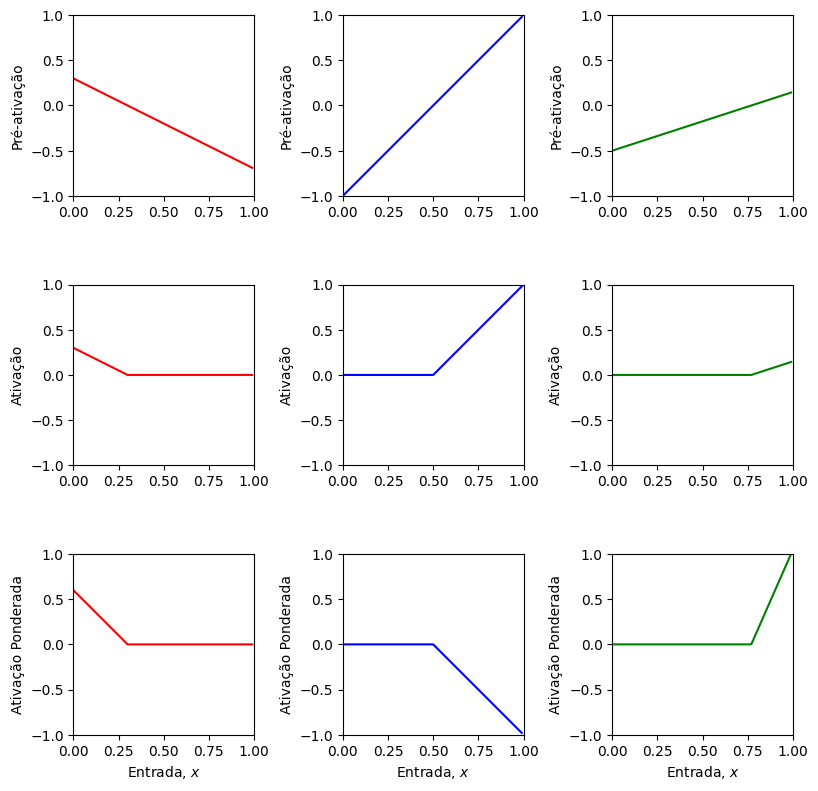

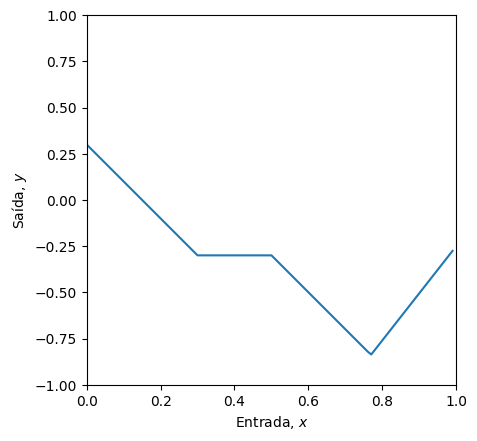

In [60]:
# Agora vamos definir alguns parâmetros e executar a rede neural
theta_10 = 0.3; theta_11 = -1.0
theta_20 = -1.0; theta_21 = 2.0
theta_30 = -0.5; theta_31 = 0.65
phi_0 = -0.3; phi_1 = 2.0; phi_2 = -1.0; phi_3 = 7.0

# Definir uma faixa de valores de entrada
x = np.arange(0, 1, 0.01)

# Executamos a rede neural para cada um desses valores de entrada
y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3 = \
    shallow_1_1_3(x, ReLU, phi_0, phi_1, phi_2, phi_3, theta_10, theta_11, theta_20, theta_21, theta_30, theta_31)

# E então plotamos
plot_neural(x, y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3, plot_all=True)

# Função de ativação Sigmóide

O ReLU não é o único tipo de função de ativação. Por muito tempo, as pessoas usaram funções sigmoides. Uma função sigmoide logística é definida pela equação

\begin{equation}
f[z] = \frac{1}{1+\exp{[-10 z ]}}
\end{equation}

(Observe que o fator de 10 não é padrão - mas nos permite plotar nos mesmos eixos que os exemplos ReLU)


In [37]:
# Defina a função sigmoide
def sigmoid(preactivation):
  # TODO escreva o código para implementar a função sigmoide e calcular a ativação na
  # unidade oculta a partir da pré-ativação. Use a função np.exp().
  activation = 1 / (1 + np.exp(- 10*preactivation))

  return activation

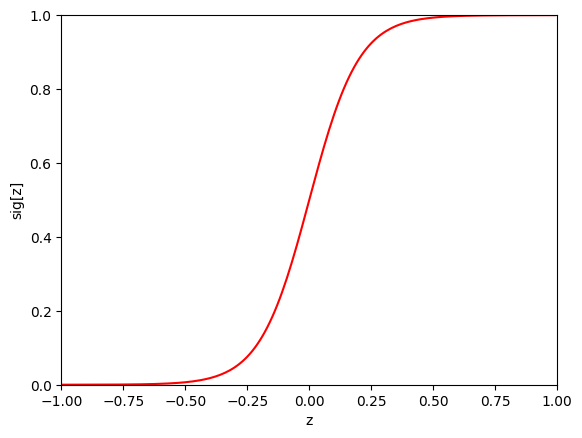

In [61]:
# Faça um vetor de entradas
z = np.arange(-1, 1, 0.01)
sig_z = sigmoid(z)

# Plote a função sigmoide
fig, ax = plt.subplots()
ax.plot(z, sig_z, 'r-')
ax.set_xlim([-1, 1])
ax.set_ylim([0, 1])
ax.set_xlabel('z')
ax.set_ylabel('sig[z]')
plt.show()

Vamos ver o que acontece quando usamos essa função de ativação em uma rede neural.

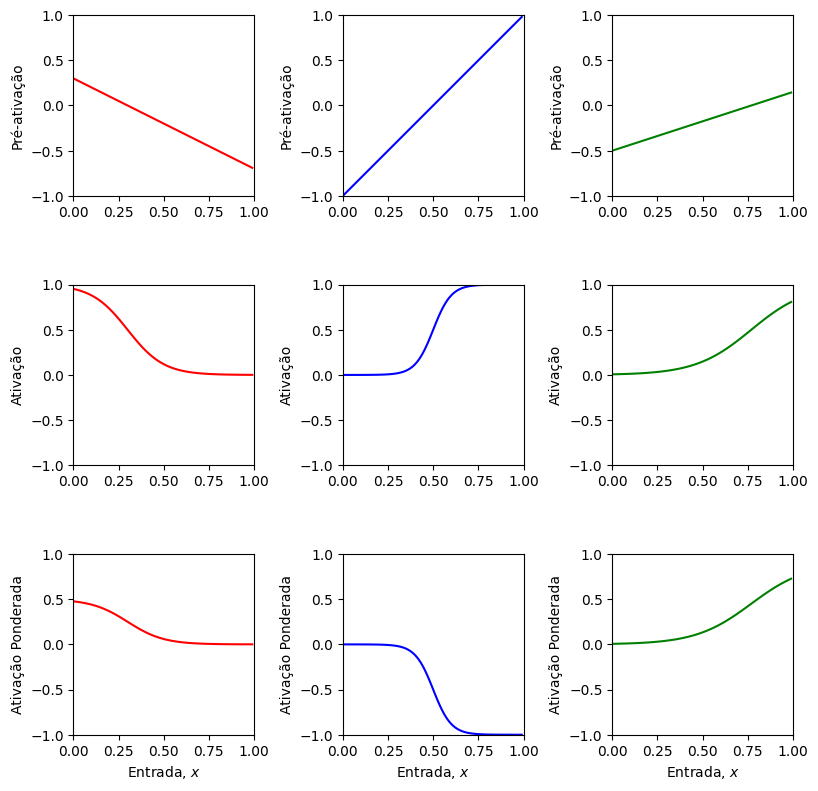

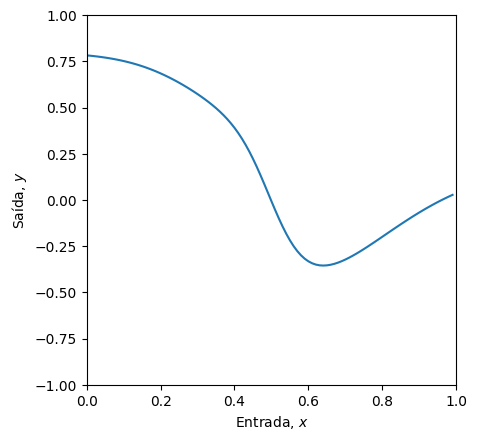

In [62]:
theta_10 =  0.3 ; theta_11 = -1.0
theta_20 = -1.0  ; theta_21 = 2.0
theta_30 = -0.5  ; theta_31 = 0.65
phi_0 = 0.3; phi_1 = 0.5; phi_2 = -1.0; phi_3 = 0.9

# Defina uma faixa de valores de entrada
x = np.arange(0,1,0.01)

# Executamos a rede neural para cada um desses valores de entrada
y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3 = \
    shallow_1_1_3(x, sigmoid, phi_0,phi_1,phi_2,phi_3, theta_10, theta_11, theta_20, theta_21, theta_30, theta_31)
# E então plotamos
plot_neural(x, y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3, plot_all=True)

Você provavelmente percebeu que isso produz curvas suaves. Então, por que não usamos isso?

In [40]:
# para medir distancias curvas nao sao uteis pois nao sao lineares, difucultando a medição do erro e a otimização do modelo 

# Função de ativação de Heaviside

A função de Heaviside é definida como:

\begin{equation}
\text{heaviside}[z] = \begin{cases} 0 & \quad z < 0 \\ 1 & \quad z \geq 0\end{cases}
\end{equation}

In [63]:
# Definir a função de Heaviside
def heaviside(preactivation):
  # TODO escreva o código para implementar a função de Heaviside e calcular a ativação na
  # unidade oculta a partir da pré-ativação. Dependendo da sua implementação, você pode precisar
  # converter uma matriz booleana em uma matriz de uns e zeros. Para fazer isso, use .astype(int)
  activation = (preactivation >= 0).astype(int)
  return (activation)

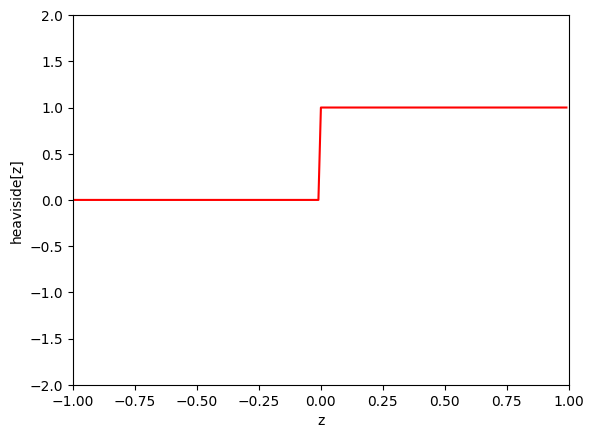

In [64]:
# Criar um vetor de entradas
z = np.arange(-1, 1, 0.01)
heav_z = heaviside(z)

# Plotar a função de Heaviside
fig, ax = plt.subplots()
ax.plot(z, heav_z, 'r-')
ax.set_xlim([-1, 1])
ax.set_ylim([-2, 2])
ax.set_xlabel('z')
ax.set_ylabel('heaviside[z]')
plt.show()

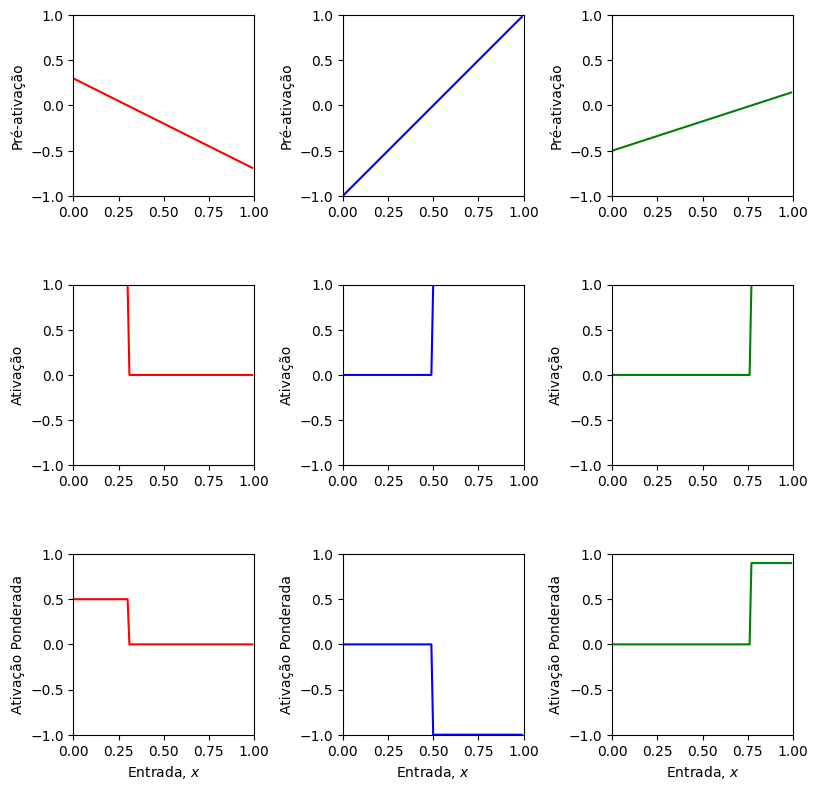

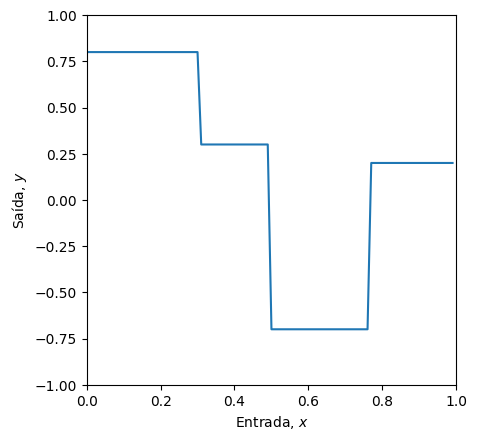

In [57]:
theta_10 = 0.3 ; theta_11 = -1.0
theta_20 = -1.0 ; theta_21 = 2.0
theta_30 = -0.5 ; theta_31 = 0.65
phi_0 = 0.3 ; phi_1 = 0.5 ; phi_2 = -1.0 ; phi_3 = 0.9

# Definir uma faixa de valores de entrada
x = np.arange(0, 1, 0.01)

# Rodamos a rede neural para cada um desses valores de entrada
y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3 = \
    shallow_1_1_3(x, heaviside, phi_0, phi_1, phi_2, phi_3, theta_10, theta_11, theta_20, theta_21, theta_30, theta_31)
# E então plotamos
plot_neural(x, y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3, plot_all=True)

Qual é o problema dessa função de ativação?

In [ ]:
# O calculo do erro é mais dificil pois a função não é diferenciável, o que dificulta a otimização do modelo

# Funções de ativação linear

As redes neurais não funcionam se a função de ativação for linear. Por exemplo, considere o que aconteceria se a função de ativação fosse:

\begin{equation}
\text{lin}[z] = a + bz
\end{equation}

In [65]:
# Defina a função de ativação linear
def lin(preactivation):
  a = 0
  b = 1
  # TODO escreva o código para implementar a função linear e calcular a ativação na
  # unidade oculta a partir da pré-ativação.
  activation = a + b * preactivation
  # Retorne
  return activation

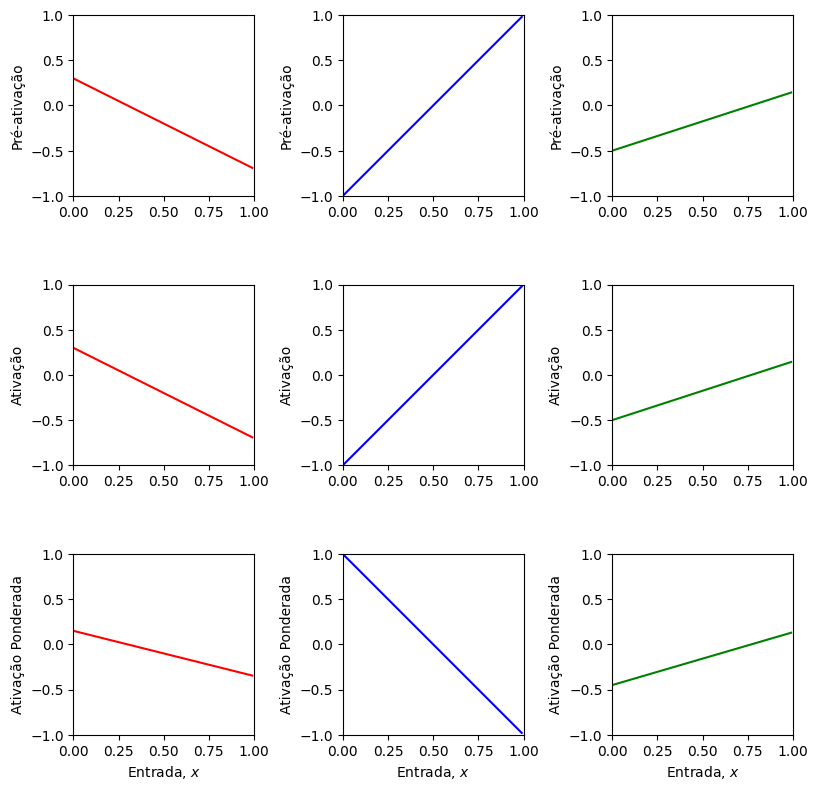

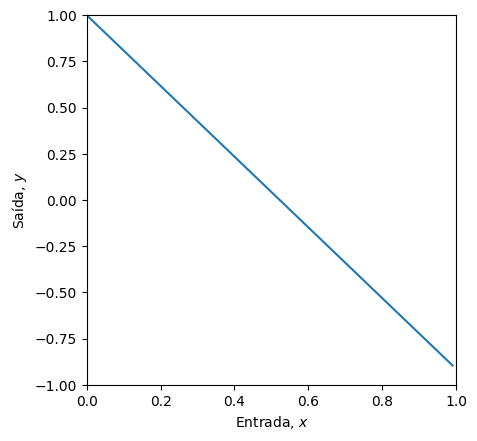

In [66]:
# TODO
# 1. A função de ativação linear acima simplesmente retorna a entrada: (0+1*z) = z
# Antes de executar o código, faça uma previsão sobre como serão os dez painéis do desenho
# Agora execute o código abaixo para ver se você estava certo. Que tipo de funções essa família pode representar?

# 2. O que acontece se você mudar os parâmetros (a, b) para diferentes valores?
# Experimente a=0.5, b=-0.4. Não se esqueça de executar a célula novamente para atualizar a função

theta_10 =  0.3 ; theta_11 = -1.0
theta_20 = -1.0  ; theta_21 = 2.0
theta_30 = -0.5  ; theta_31 = 0.65
phi_0 = 0.3; phi_1 = 0.5; phi_2 = -1.0; phi_3 = 0.9

# Defina uma faixa de valores de entrada
x = np.arange(0,1,0.01)

# Executamos a rede neural para cada um desses valores de entrada
y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3 = \
    shallow_1_1_3(x, lin, phi_0,phi_1,phi_2,phi_3, theta_10, theta_11, theta_20, theta_21, theta_30, theta_31)
# E então plotamos
plot_neural(x, y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3, plot_all=True)